# Import Libraries

In [415]:
import pandas as pd
import numpy as np

# Analysis & cleansing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



# Main Model
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Load Starcraft Player Data and Information

In [2]:
df = pd.read_csv("starcraft_player_data.csv")
df.head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


In [3]:
# Getting an idea of the number of  rows and columns
df.shape

(3395, 20)

In [4]:
# Finding summary stats

df.describe()

# There is a difference in scale and ranges

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [5]:
# Checking the class distribution

df.groupby('LeagueIndex').size()

# There is a difference in samples for each class which could be a problem with class balance

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
dtype: int64

In [6]:
# Checking datatypes and non missing values

df.info()

# Some of the object columns should be ints
# Can’t do numerical analysis on strings, so these will have to be further examined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

# Cleaning Data set

In [7]:
# Checking if it was nulls in the columns with datatpe Obj
obj_columns = df.iloc[:, [2, 3, 4]]
print(obj_columns)

     Age HoursPerWeek TotalHours
0     27           10       3000
1     23           10       5000
2     30           10        200
3     19           20        400
4     32           10        500
...   ..          ...        ...
3390   ?            ?          ?
3391   ?            ?          ?
3392   ?            ?          ?
3393   ?            ?          ?
3394   ?            ?          ?

[3395 rows x 3 columns]


In [8]:
# The nulls were placed as question marks

# Output all data table that contains the question mark
rows_with_question = df[df['TotalHours'] == '?']
rows_with_question

# Nulls are almost all of LeagueIndex 8

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


In [10]:
# Removing the columns with nulls because if I remove the rows with missing values it would remove almost all the rows for Rank 8

Remove_columns = ['Age', 'TotalHours', 'HoursPerWeek', ]
New_df = df.drop(columns=Remove_columns)

New_df

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


<Figure size 1400x1200 with 0 Axes>

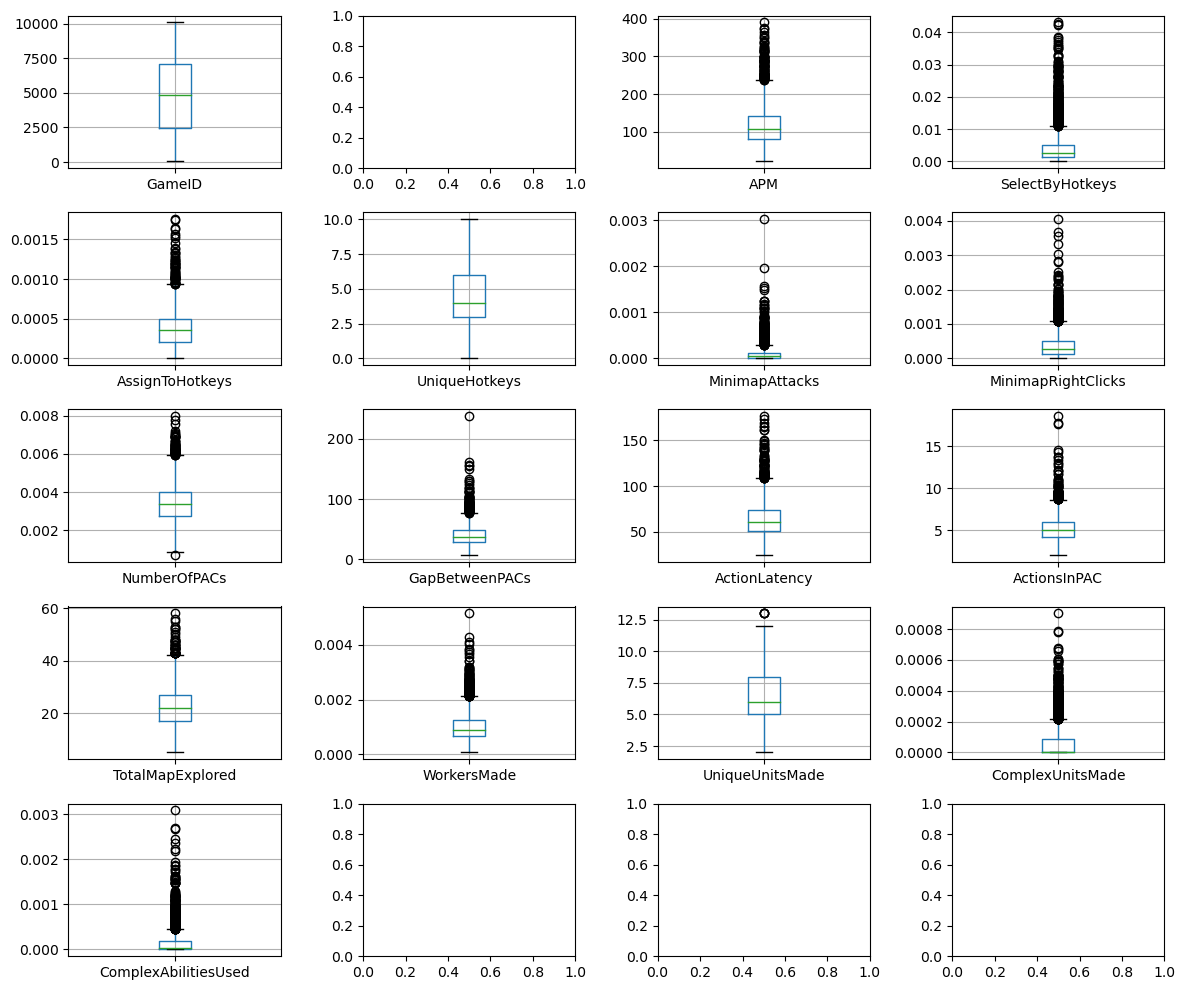

In [11]:
# box and whisker plots to visualize any outliers

# setting the size 
plt.figure(figsize=(14, 12))

# Calculate the number of rows and columns for the subplot layout
num_cols = 4
num_rows = (len(New_df.columns) - 1) // num_cols + 1

# Create the subplot layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each column and create a box plot
for i, col in enumerate(New_df.columns):
    if col != 'LeagueIndex':  # Exclude LeagueIndex column from box plot
        New_df.boxplot(column=col, ax=axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

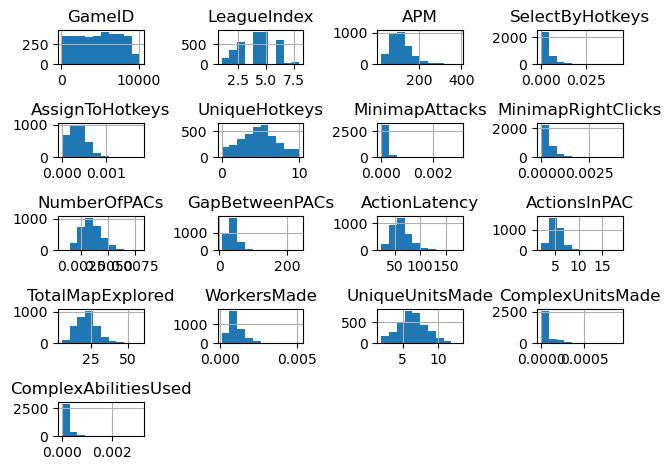

In [12]:
# Histogram to visualize distribution
New_df.hist()

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

# Some Skewed and Gaussian distribution

In [13]:
#Function to find and remove the extreme outliers by +- 3 times the standard deviation from the each columns means
def outlier_removal(cols):
    
# Upper and lower limits
    upper_limit = cols.mean() + 3 * cols.std()
    lower_limit = cols.mean() - 3 * cols.std()

    print("Upper limit:", upper_limit)
    print("Lower limit:", lower_limit)

# Filter based on limits
    cleaned_data = cols[((cols >= lower_limit) & (cols <= upper_limit)).all(axis=1)]
    return cleaned_data

cleaned_data = outlier_removal(New_df)

# resetting the index so it matches the amount of rows
cleaned_data.reset_index(drop=True, inplace=True)

cleaned_data

Upper limit: GameID                  12964.846925
LeagueIndex                 8.736075
APM                       272.882820
SelectByHotkeys             0.020152
AssignToHotkeys             0.001048
UniqueHotkeys              11.445653
MinimapAttacks              0.000596
MinimapRightClicks          0.001518
NumberOfPACs                0.006440
GapBetweenPACs             91.822273
ActionLatency             121.456010
ActionsInPAC                9.757495
TotalMapExplored           44.426822
WorkersMade                 0.002589
UniqueUnitsMade            12.107111
ComplexUnitsMade            0.000393
ComplexAbilitiesUsed        0.000938
dtype: float64
Lower limit: GameID                 -3354.822182
LeagueIndex               -0.367886
APM                      -38.788926
SelectByHotkeys           -0.011555
AssignToHotkeys           -0.000301
UniqueHotkeys             -2.716345
MinimapAttacks            -0.000399
MinimapRightClicks        -0.000744
NumberOfPACs               0.000486
GapBet

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,10052,8,190.2396,0.008720,0.000879,10,0.000171,0.000342,0.004971,17.9901,35.9509,5.5872,21,0.000904,5,0.000000,0.000000
2855,10059,8,219.3894,0.005926,0.000741,6,0.000440,0.000709,0.005185,17.0456,30.5342,6.6749,35,0.002072,9,0.000225,0.000064
2856,10064,8,256.5888,0.019592,0.000580,8,0.000416,0.000357,0.005812,17.0462,34.3734,5.0563,19,0.001308,7,0.000000,0.000000
2857,10065,8,248.4012,0.016018,0.000874,9,0.000388,0.000372,0.005987,16.3144,30.2486,5.0973,21,0.001197,6,0.000000,0.000000


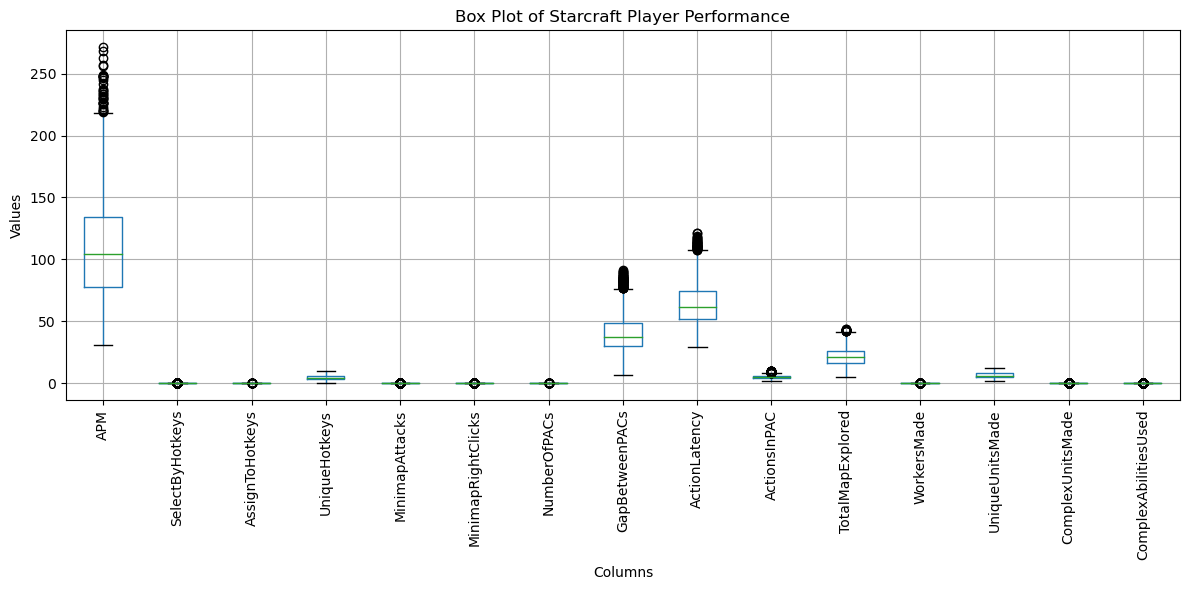

In [16]:
# Box plot to visualize removed outliers
cols = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 
        'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 
        'ComplexUnitsMade', 'ComplexAbilitiesUsed']

plt.figure(figsize=(12, 6))
cleaned_data[cols].boxplot()

plt.title('Box Plot of Starcraft Player Performance')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.xticks(rotation=90)  #Adjusts the rotation angle of column label to be more readable

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
# Normalizing data to better scale

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(cleaned_data), columns=cleaned_data.columns)
df_normalized

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.000000,0.571429,0.469627,0.174465,0.212317,0.7,0.186025,0.261933,0.699053,0.306744,0.128069,0.351688,0.589744,0.511363,0.4,0.000000,0.000000
1,0.000299,0.571429,0.409468,0.163975,0.250746,0.4,0.497975,0.288719,0.595675,0.309714,0.144085,0.363696,0.435897,0.427016,0.3,0.000000,0.223172
2,0.000399,0.428571,0.163315,0.054649,0.324298,0.4,0.497242,0.308063,0.332197,0.448075,0.501750,0.259898,0.435897,0.240569,0.4,0.000000,0.202948
3,0.000498,0.285714,0.319636,0.051297,0.205943,0.1,0.090220,0.362811,0.495627,0.266074,0.267496,0.373047,0.358974,0.108359,0.5,0.000000,0.412412
4,0.000598,0.285714,0.383132,0.056383,0.316330,0.2,0.000000,0.887021,0.225865,0.189016,0.357928,0.951239,0.256410,0.419125,0.2,0.000000,0.020701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,0.996810,1.000000,0.662832,0.432796,0.849796,1.0,0.289552,0.228315,0.722258,0.133587,0.074799,0.460155,0.410256,0.306688,0.3,0.000000,0.000000
2855,0.997508,1.000000,0.783891,0.294110,0.715842,0.6,0.745363,0.473048,0.763151,0.122444,0.016108,0.601211,0.769231,0.791812,0.7,0.574142,0.069252
2856,0.998006,1.000000,0.938380,0.972397,0.560261,0.8,0.704855,0.238194,0.882777,0.122451,0.057706,0.391306,0.358974,0.474609,0.5,0.000000,0.000000
2857,0.998106,1.000000,0.904377,0.795025,0.844379,0.9,0.657614,0.248465,0.916051,0.113818,0.013013,0.396623,0.410256,0.428594,0.4,0.000000,0.000000


In [18]:
league_means = df_normalized.groupby('LeagueIndex').mean().drop('GameID', axis=1)
league_means


,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,
0.000000,0.138172,0.056427,0.190026,0.313953,0.043963,0.146642,0.253865,0.575009,0.632697,0.328799,0.339495,0.198047,0.375969,0.034699,0.047578
0.142857,0.187805,0.077655,0.222399,0.341424,0.069519,0.172352,0.291500,0.526594,0.540919,0.370727,0.382790,0.263830,0.411974,0.050284,0.061347
0.285714,0.244775,0.108667,0.274770,0.370949,0.092119,0.208800,0.348379,0.456324,0.472854,0.388323,0.397284,0.304912,0.437945,0.091422,0.092869
0.428571,0.301481,0.149199,0.321359,0.392255,0.115617,0.227486,0.405950,0.406037,0.389611,0.397274,0.428442,0.336648,0.455571,0.128566,0.117518
0.571429,0.394784,0.217643,0.390887,0.458918,0.156624,0.254013,0.487659,0.335396,0.296504,0.421297,0.454266,0.388705,0.459942,0.154507,0.146209
0.714286,0.490313,0.306912,0.468082,0.541277,0.204204,0.279912,0.575630,0.282064,0.220604,0.425880,0.471795,0.406755,0.475957,0.142990,0.151944
0.857143,0.573348,0.403316,0.602449,0.687500,0.362997,0.293739,0.676991,0.234419,0.154474,0.391846,0.554487,0.381558,0.512500,0.270889,0.168917
1.000000,0.728446,0.607255,0.771396,0.733333,0.410465,0.346685,0.738556,0.180823,0.100250,0.415568,0.455840,0.463476,0.422222,0.063794,0.019541


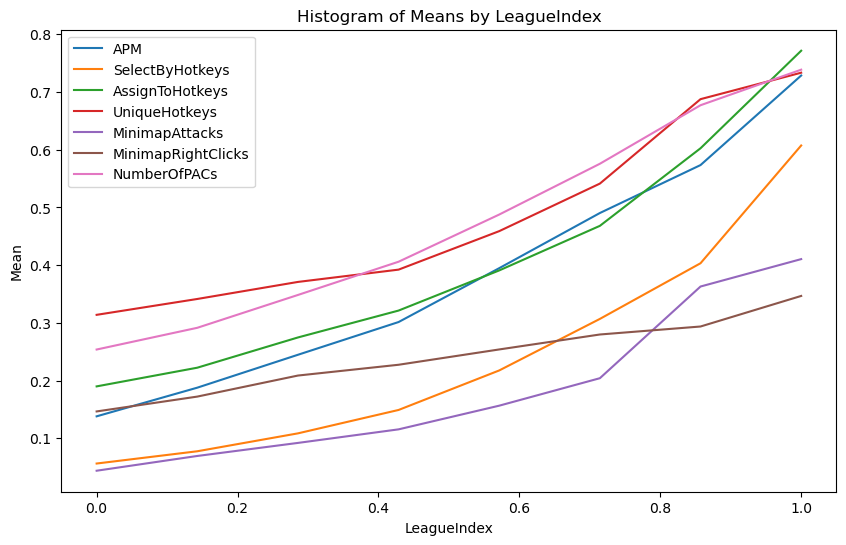

In [19]:
# Line plot grouped by leagueIndex using normalized data

# Splitting up the columns for better visability
first_half = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 
                            'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs']
league_means[first_half].plot(kind='line', figsize=(10, 6))
plt.xlabel('LeagueIndex')
plt.ylabel('Mean')
plt.title('Histogram of Means by LeagueIndex')
plt.xticks(rotation=0)


plt.show()

# X-axis left to right ticks representing 1-8 LeagueIndex (ranks)

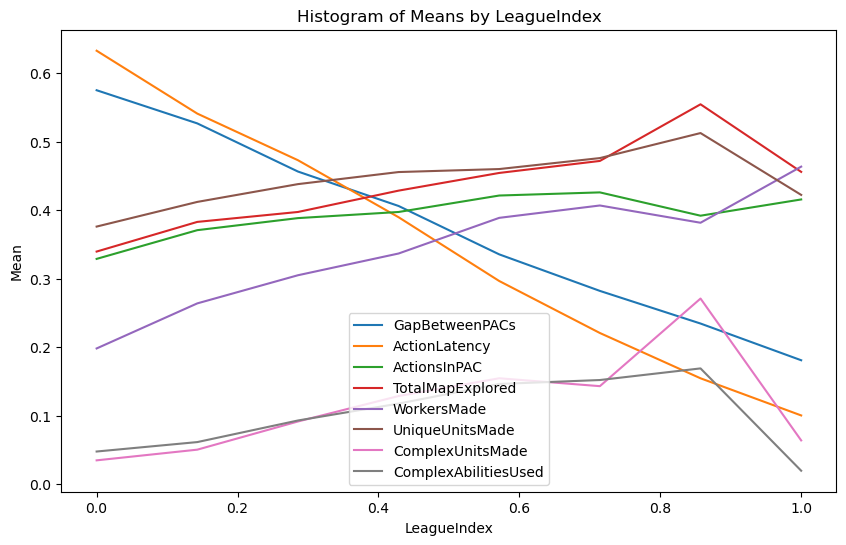

In [20]:
# second half
second_half = ['GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 
               'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

league_means[second_half].plot(kind='line', figsize=(10, 6))
plt.xlabel('LeagueIndex')
plt.ylabel('Mean')
plt.title('Histogram of Means by LeagueIndex')
plt.xticks(rotation=0)


plt.show()

In [21]:
# gentle slope in some of the columns suggests a moderate or steady relationship between the variables. 
# This could indicate a weak relationship between the column and LeagueIndex.

In [22]:
# Finding the variances
# A large variance indicates that the data is spread out; a small variance indicates it is clustered closely around the mean.

variances = df_normalized.var()
# remove any features threshold = 0.01
variances

GameID                  0.069957
LeagueIndex             0.040998
APM                     0.029934
SelectByHotkeys         0.030728
AssignToHotkeys         0.035494
UniqueHotkeys           0.052787
MinimapAttacks          0.030751
MinimapRightClicks      0.037463
NumberOfPACs            0.029533
GapBetweenPACs          0.028798
ActionLatency           0.032841
ActionsInPAC            0.027649
TotalMapExplored        0.031110
WorkersMade             0.033837
UniqueUnitsMade         0.032786
ComplexUnitsMade        0.048019
ComplexAbilitiesUsed    0.033217
dtype: float64

In [23]:
# Correlation plot
correlation_matrix = df_normalized.corr()

# Print the correlation matrix
correlation_matrix

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.045560,0.086085,0.077109,0.067124,0.096373,0.049832,0.013162,0.058085,-0.088047,-0.060238,0.030315,0.036827,-0.020217,0.041925,-0.009728,-0.023035
LeagueIndex,0.045560,1.000000,0.608780,0.449588,0.454695,0.299393,0.280284,0.190242,0.567469,-0.501425,-0.642893,0.134472,0.201441,0.297882,0.125014,0.159173,0.169843
APM,0.086085,0.608780,1.000000,0.791798,0.509965,0.311637,0.240925,0.300302,0.673914,-0.600382,-0.776736,0.433359,0.252352,0.412677,0.117905,0.153937,0.122621
SelectByHotkeys,0.077109,0.449588,0.791798,1.000000,0.483795,0.273678,0.176462,0.110776,0.425498,-0.314226,-0.454572,0.157611,0.125595,0.207648,0.030726,0.086048,0.080396
AssignToHotkeys,0.067124,0.454695,0.509965,0.483795,1.000000,0.384844,0.197504,0.137612,0.424177,-0.350829,-0.436159,0.086830,0.168196,0.190836,0.138058,0.171390,0.206211
UniqueHotkeys,0.096373,0.299393,0.311637,0.273678,0.384844,1.000000,0.150237,0.089977,0.323912,-0.208152,-0.280392,-0.010560,0.238579,0.102379,0.208544,0.113792,0.093218
MinimapAttacks,0.049832,0.280284,0.240925,0.176462,0.197504,0.150237,1.000000,0.212080,0.149283,-0.238298,-0.197013,0.140070,0.145209,0.072544,0.104260,0.064505,0.070204
MinimapRightClicks,0.013162,0.190242,0.300302,0.110776,0.137612,0.089977,0.212080,1.000000,0.121985,-0.229800,-0.212363,0.333234,0.170008,0.233567,0.172580,0.075617,0.079616
NumberOfPACs,0.058085,0.567469,0.673914,0.425498,0.424177,0.323912,0.149283,0.121985,1.000000,-0.468038,-0.827496,-0.223627,0.448628,0.277384,0.285027,0.182604,0.166863
GapBetweenPACs,-0.088047,-0.501425,-0.600382,-0.314226,-0.350829,-0.208152,-0.238298,-0.229800,-0.468038,1.000000,0.633160,-0.362457,-0.061216,-0.225214,-0.054092,-0.065906,-0.113055


In [24]:
# Correlation based on LeagueIndex
target_correlations = correlation_matrix['LeagueIndex']
target_correlations

GameID                  0.045560
LeagueIndex             1.000000
APM                     0.608780
SelectByHotkeys         0.449588
AssignToHotkeys         0.454695
UniqueHotkeys           0.299393
MinimapAttacks          0.280284
MinimapRightClicks      0.190242
NumberOfPACs            0.567469
GapBetweenPACs         -0.501425
ActionLatency          -0.642893
ActionsInPAC            0.134472
TotalMapExplored        0.201441
WorkersMade             0.297882
UniqueUnitsMade         0.125014
ComplexUnitsMade        0.159173
ComplexAbilitiesUsed    0.169843
Name: LeagueIndex, dtype: float64

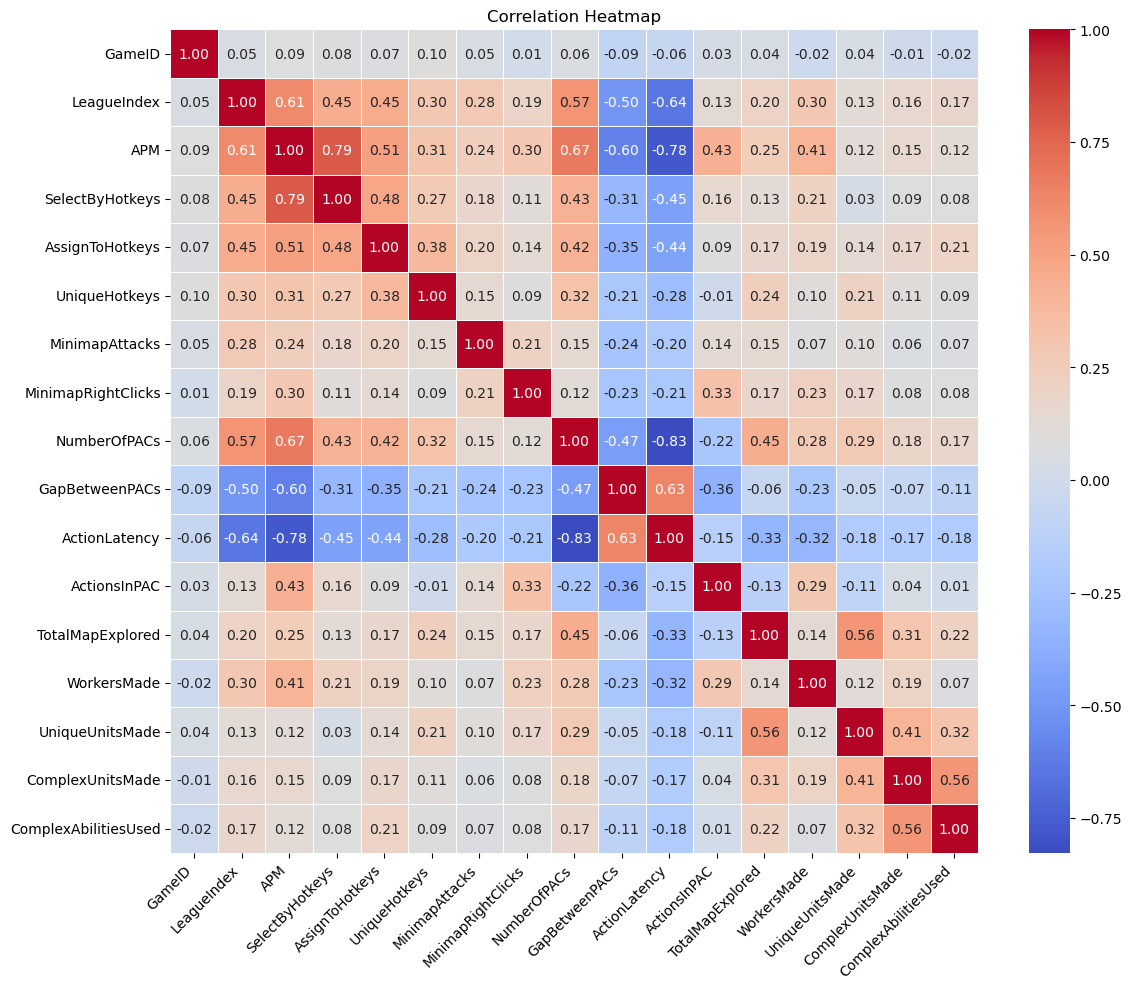

In [26]:
# Heatmap to visualize correlation

# Set the figure size
plt.figure(figsize=(12, 10))

# Customize the heatmap to fit
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# title
plt.title('Correlation Heatmap')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust spacing
plt.tight_layout()

plt.show()

In [255]:

# After analyzing and studying the data. Drop multiple highly correlated, weakly related features and reduce overfitting.

dropping = ['GameID', 'SelectByHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'ActionLatency', 
            'ComplexUnitsMade','UniqueUnitsMade', 'TotalMapExplored']

starcraft_df = cleaned_data.drop(columns=dropping) #dropping from cleaned data set

starcraft_df

,LeagueIndex,APM,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionsInPAC,WorkersMade,ComplexAbilitiesUsed
0,5,143.7180,0.000220,0.004849,32.6677,4.7508,0.001397,0.000000
1,5,129.2322,0.000259,0.004307,32.9194,4.8434,0.001193,0.000208
2,4,69.9612,0.000336,0.002926,44.6475,4.0430,0.000745,0.000189
3,3,107.6016,0.000213,0.003783,29.2203,4.9155,0.000426,0.000384
4,3,122.8908,0.000327,0.002368,22.6885,9.3740,0.001174,0.000019
...,...,...,...,...,...,...,...,...
2854,8,190.2396,0.000879,0.004971,17.9901,5.5872,0.000904,0.000000
2855,8,219.3894,0.000741,0.005185,17.0456,6.6749,0.002072,0.000064
2856,8,256.5888,0.000580,0.005812,17.0462,5.0563,0.001308,0.000000
2857,8,248.4012,0.000874,0.005987,16.3144,5.0973,0.001197,0.000000


In [ ]:
# Applying SMOTE for impbalanced classes


# Modeling

### Input Features (Player stats)

In [428]:
X = starcraft_df.iloc[:, 1:9].values
X

array([[1.4371800e+02, 2.1969740e-04, 4.8490365e-03, ..., 4.7508000e+00,
        1.3966000e-03, 0.0000000e+00],
       [1.2923220e+02, 2.5946170e-04, 4.3070643e-03, ..., 4.8434000e+00,
        1.1935000e-03, 2.0757000e-04],
       [6.9961200e+01, 3.3557050e-04, 2.9257550e-03, ..., 4.0430000e+00,
        7.4455000e-04, 1.8876000e-04],
       ...,
       [2.5658880e+02, 5.7973600e-04, 5.8122250e-03, ..., 5.0563000e+00,
        1.3081000e-03, 0.0000000e+00],
       [2.4840120e+02, 8.7372990e-04, 5.9866675e-03, ..., 5.0973000e+00,
        1.1973000e-03, 0.0000000e+00],
       [1.5140460e+02, 9.4911600e-04, 4.3631006e-03, ..., 4.3312000e+00,
        9.4912000e-04, 9.9161000e-05]])

In [429]:
test_row = starcraft_df.iloc[:, 1:9].values
test_row

array([[1.4371800e+02, 2.1969740e-04, 4.8490365e-03, ..., 4.7508000e+00,
        1.3966000e-03, 0.0000000e+00],
       [1.2923220e+02, 2.5946170e-04, 4.3070643e-03, ..., 4.8434000e+00,
        1.1935000e-03, 2.0757000e-04],
       [6.9961200e+01, 3.3557050e-04, 2.9257550e-03, ..., 4.0430000e+00,
        7.4455000e-04, 1.8876000e-04],
       ...,
       [2.5658880e+02, 5.7973600e-04, 5.8122250e-03, ..., 5.0563000e+00,
        1.3081000e-03, 0.0000000e+00],
       [2.4840120e+02, 8.7372990e-04, 5.9866675e-03, ..., 5.0973000e+00,
        1.1973000e-03, 0.0000000e+00],
       [1.5140460e+02, 9.4911600e-04, 4.3631006e-03, ..., 4.3312000e+00,
        9.4912000e-04, 9.9161000e-05]])

### Output Features (Player Ranks)

In [430]:
# Listing out the class ranks
label_encoder = LabelEncoder()

ranks = starcraft_df['LeagueIndex']

ranks = label_encoder.fit_transform(ranks)

# Get the target names from the LabelEncoder
target_ranks = label_encoder.classes_

# Display the target names
print(target_ranks)

[1 2 3 4 5 6 7 8]


In [431]:
y = starcraft_df.iloc[:, 0]
y

0       5
1       5
2       4
3       3
4       3
       ..
2854    8
2855    8
2856    8
2857    8
2858    8
Name: LeagueIndex, Length: 2859, dtype: int64

### Examining data dimensions

In [432]:
X.shape

(2859, 7)

In [433]:
y.shape

(2859,)

In [434]:
# The distribution of each target class
class_counts = y.value_counts()
class_counts

4    736
5    684
3    506
6    470
2    309
1    129
7     16
8      9
Name: LeagueIndex, dtype: int64

### Building Classification Model using Random Forest

In [435]:
# Setting up for modeling

# Adding a class weight to automatically handle the imbalanced classes
clf = RandomForestClassifier()

clf.fit(X, y)


RandomForestClassifier()

### Feature Importances

In [436]:
# Ordered by respective input feautres
clf.feature_importances_

array([0.17864947, 0.14569088, 0.16233375, 0.15645155, 0.13445354,
       0.13847857, 0.08394224])

In [437]:
### Making Predicions & Probability

In [438]:
clf.predict(X[[0]])

array([5], dtype=int64)

In [439]:
clf.predict_proba(X[[0]])

array([[0.  , 0.01, 0.03, 0.04, 0.78, 0.13, 0.01, 0.  ]])

##### Splitting the Data for Training and Testing (80/20 ratio)

In [440]:
# 70% of data used for training, 30% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [441]:
X_train.shape, y_train.shape

((2001, 7), (2001,))

In [442]:
X_test.shape, y_test.shape

((858, 7), (858,))

In [443]:
# Using SMOTE for class imbalance for training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Rebuilding Model for Training & Testing Data

In [444]:
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

## Perform predictions on the test set

### Predicted

In [445]:
y_pred = clf.predict(X_test)
y_pred

array([4, 6, 4, 4, 5, 2, 5, 4, 4, 3, 3, 7, 3, 1, 4, 3, 6, 6, 1, 4, 1, 4,
       3, 1, 2, 2, 5, 5, 4, 5, 4, 4, 2, 5, 5, 6, 4, 3, 8, 4, 3, 6, 5, 6,
       5, 1, 6, 2, 2, 5, 6, 4, 2, 5, 1, 2, 4, 6, 6, 4, 5, 5, 6, 3, 6, 6,
       4, 6, 6, 6, 2, 3, 5, 1, 5, 3, 6, 2, 3, 3, 1, 1, 3, 3, 6, 3, 5, 3,
       6, 1, 1, 1, 4, 4, 5, 5, 6, 2, 1, 5, 1, 5, 4, 5, 1, 4, 2, 1, 6, 2,
       1, 6, 6, 4, 3, 1, 2, 5, 3, 3, 5, 6, 5, 3, 1, 5, 5, 5, 2, 4, 3, 4,
       2, 1, 5, 4, 1, 3, 6, 4, 2, 1, 5, 2, 4, 2, 4, 5, 5, 1, 6, 6, 2, 4,
       4, 5, 3, 5, 8, 5, 6, 3, 1, 4, 4, 2, 5, 6, 4, 3, 4, 4, 3, 4, 1, 4,
       5, 4, 3, 3, 5, 2, 4, 6, 5, 4, 4, 4, 4, 6, 5, 1, 6, 3, 4, 6, 1, 4,
       5, 3, 5, 1, 6, 2, 3, 7, 6, 1, 5, 2, 3, 5, 3, 6, 6, 6, 3, 5, 3, 5,
       2, 5, 7, 6, 2, 8, 4, 1, 5, 6, 2, 4, 5, 5, 4, 2, 1, 6, 3, 6, 4, 5,
       5, 5, 4, 5, 6, 5, 6, 5, 6, 6, 5, 7, 4, 4, 4, 5, 6, 2, 6, 5, 3, 5,
       6, 3, 5, 3, 6, 6, 4, 5, 8, 5, 1, 3, 5, 4, 2, 4, 5, 3, 3, 5, 1, 6,
       6, 5, 3, 4, 6, 6, 3, 3, 4, 4, 3, 4, 1, 5, 4,

In [446]:
## Actual

In [447]:
y_test.values


array([4, 6, 5, 6, 5, 2, 4, 4, 4, 2, 5, 5, 6, 4, 3, 2, 4, 6, 3, 5, 3, 2,
       3, 2, 2, 2, 4, 6, 4, 4, 5, 4, 1, 4, 6, 6, 4, 3, 6, 5, 3, 6, 4, 7,
       4, 2, 6, 2, 1, 6, 4, 5, 4, 5, 5, 3, 4, 3, 5, 4, 5, 5, 5, 5, 5, 4,
       5, 6, 6, 2, 4, 5, 4, 2, 5, 4, 4, 4, 5, 3, 2, 2, 2, 2, 5, 3, 3, 1,
       6, 4, 4, 1, 3, 5, 5, 4, 5, 2, 3, 3, 5, 6, 3, 5, 1, 5, 2, 2, 5, 2,
       3, 4, 6, 4, 3, 3, 4, 4, 3, 2, 6, 6, 5, 5, 2, 4, 5, 4, 3, 4, 5, 2,
       3, 1, 3, 2, 1, 4, 6, 4, 1, 5, 6, 3, 5, 4, 5, 5, 4, 5, 5, 6, 1, 4,
       4, 5, 5, 6, 6, 5, 4, 4, 4, 4, 1, 2, 6, 6, 3, 5, 3, 6, 3, 2, 2, 3,
       5, 2, 2, 4, 6, 4, 4, 3, 6, 4, 6, 5, 4, 6, 4, 4, 5, 2, 3, 5, 4, 4,
       6, 4, 4, 2, 8, 3, 2, 6, 4, 4, 5, 1, 3, 5, 4, 6, 4, 2, 5, 4, 2, 3,
       3, 6, 5, 6, 4, 6, 3, 3, 4, 3, 2, 3, 5, 5, 5, 3, 2, 5, 4, 3, 3, 5,
       4, 6, 4, 6, 5, 5, 6, 4, 4, 6, 3, 6, 3, 4, 3, 5, 8, 3, 8, 5, 3, 6,
       6, 6, 5, 4, 6, 6, 4, 6, 6, 3, 2, 4, 4, 4, 3, 2, 3, 2, 2, 6, 5, 5,
       5, 5, 1, 6, 5, 5, 5, 4, 4, 6, 3, 5, 1, 6, 5,

In [448]:
## Model Performance Score

In [449]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.317016317016317


In [398]:
# Report on the model
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           1       0.29      0.12      0.17        42
           2       0.35      0.28      0.31        99
           3       0.28      0.30      0.29       147
           4       0.32      0.38      0.35       214
           5       0.36      0.37      0.36       208
           6       0.49      0.48      0.48       144
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3

    accuracy                           0.35       858
   macro avg       0.26      0.24      0.25       858
weighted avg       0.35      0.35      0.35       858



C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
